<a href="https://colab.research.google.com/github/nkurinsky/THz-FTS/blob/master/python/Notebooks/BBspectrum_FTS_(arbitrary_FrequencyList).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of this file is an attempt at using the outputted frequency array from the psd formula as the list of frequencies/wavlengths that the power is calucalted at. This would resolve an issue where the total power is not correct due to different sized integration slices and separation between evaluation points. This file was created on April 16, 2020 (hence its name)

In [0]:
from pylab import *
from scipy import fft
import matplotlib.pyplot as plt
from scipy.signal import periodogram as psd
from scipy.signal import get_window
import numpy as np
from scipy.signal import find_peaks
from math import sqrt, sin
from cmath import pi

%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import sys
sys.path.append('/content/gdrive/My Drive/BREAD Experiment/FTS Modeling/lib/')
from BlackbodyFunctions import *
from FTSFunctions import *

Motorized stage details (https://www.thorlabs.com/newgrouppage9.cfm?objectgroup_id=2163): 


*   Max Velocity = 2.6 mm/s
*   Max Travel Range = 12mm (12e3 µm)
*   Minimum Step Size = 0.10 µm

*   inv step size: 10000 Hz (= $\frac{max velocity}{step size}$)

Review this document for understanding of how FTS works/ data looks: https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Supplemental_Modules_(Physical_and_Theoretical_Chemistry)/Spectroscopy/Fundamentals_of_Spectroscopy/The_Power_of_the_Fourier_Transform_for_Spectroscopists

### Want to compare different signals on the order of our expected magnitude: 

*   Source off (noise on the order of 2e-8  W)
*   Source on (blackbody spectrum with noise on the order of 1e-7W)

the length of the frequencies list is  59999


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

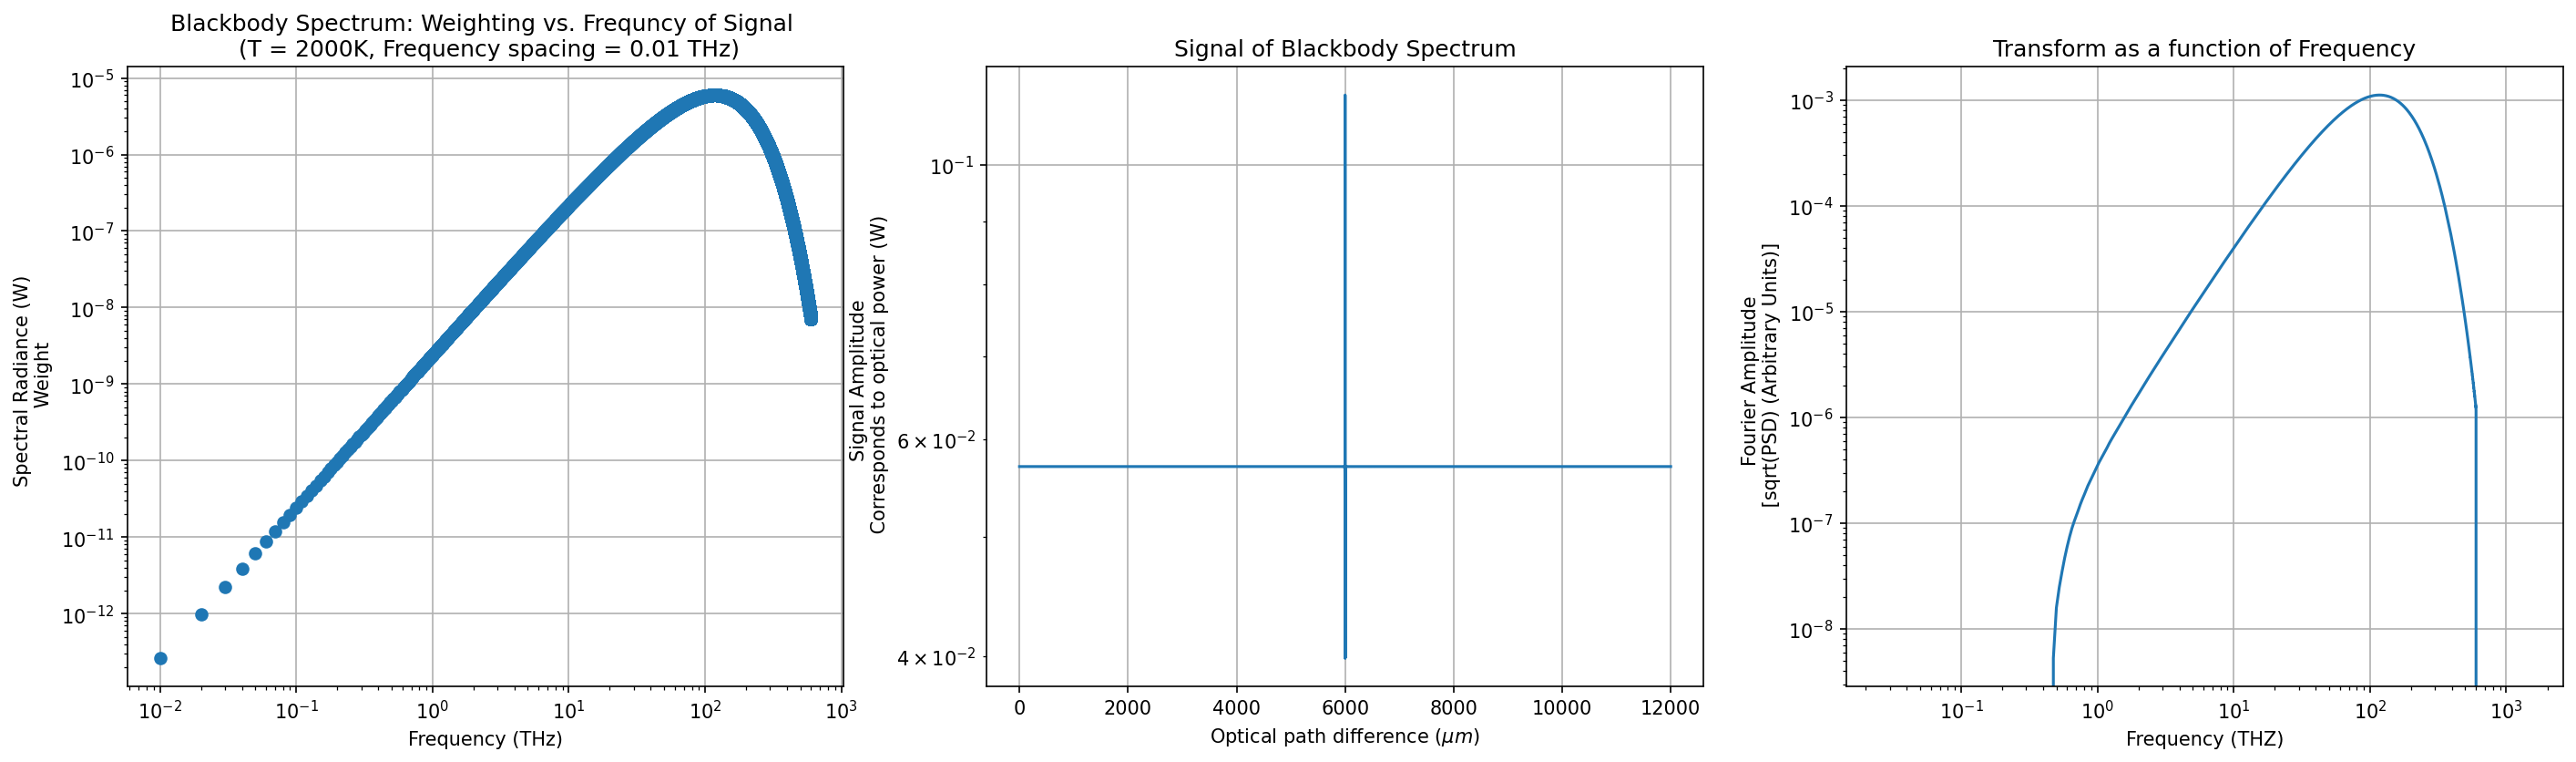

In [0]:
c_micron_per_second = 3e8 * 1e6
Hz_to_THz = 1e-12
lambda_or_nu = False

fig = plt.figure(figsize=(23, 6), dpi=150)  

#for blackbody spectrum, decide frequeny range and number of frequency slices 
min_frequency = 0.01 #THz
max_frequency = 600 #THz
frequency_slice_size = min_frequency #THz
frequencies = arange(min_frequency, max_frequency, frequency_slice_size) #still in THz
print("the length of the frequencies list is ", len(frequencies))

x,y,weights_nofilter = blackbody_input_function(lambda_or_nu, frequencies, frequency_slice_size, filter='no', sigma = 2e-8)

plt.subplot(1, 3, 1)
plt.plot(frequencies, weights_nofilter , 'o')

plt.subplot(1, 3, 2)
plt.plot(x,y)

plt.subplot(1, 3, 3)
frequency, spectrum = psd_frequency(y,'parzen')
spectrum = adjust_spectrum(spectrum)
plt.semilogy(frequency, spectrum)

#plot details for blackbody spectrum plot
plt.subplot(1, 3, 1)
plt.grid(True)
xscale('log')
plt.yscale('log')
title = "Blackbody Spectrum: Weighting vs. Frequncy of Signal \n (T = " + str(Temp) + "K, Frequency spacing = "+ str(round(frequency_slice_size,2)) + " THz)"
plt.title(title)
plt.xlabel("Frequency (THz)")
plt.ylabel("Spectral Radiance (W) \n Weight")

#plot details for signal plot
plt.subplot(1, 3, 2)
plt.grid(True)
plt.yscale('log')
plt.title("Signal of Blackbody Spectrum")
plt.xlabel("Optical path difference ($\mu m$)")
plt.ylabel("Signal Amplitude \n Corresponds to optical power (W)")

#plot details for fourier transform plot in terms of frequency rather than wavenumber
plt.subplot(1, 3, 3)
plt.title("Transform as a function of Frequency")
plt.grid(True)
plt.xscale('log')
plt.xlabel('Frequency (THZ)')
plt.ylabel("Fourier Amplitude \n [sqrt(PSD) (Arbitrary Units)]")
plt.show()

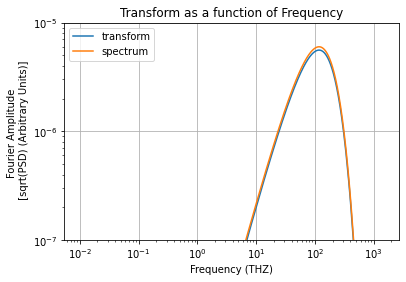

In [0]:
plt.title("Transform as a function of Frequency")
plt.semilogy(frequency, spectrum*0.005, label='transform') 
plt.semilogy(frequencies, weights_nofilter, label = 'spectrum')
plt.grid(True)
plt.xscale('log')
plt.xlabel('Frequency (THZ)')
plt.ylabel("Fourier Amplitude \n [sqrt(PSD) (Arbitrary Units)]")
plt.legend()
plt.ylim(1e-7,1e-5)
plt.show()